In [177]:
%pip install tensorboard pandas tensorflow
%pip install matplotlib seaborn tabulate
%pip install -U tbparse

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [297]:
import os
import pandas as pd
import seaborn as sns
import tensorboard as tb
from pathlib import Path
from tbparse import SummaryReader
from matplotlib import pyplot as plt
from IPython.display import display

## Plotting Settings

In [298]:
pd.set_option('display.max_rows', 200)
plotting_context = "paper"
default_palette = "colorblind"
font_scale = 1.5
sns.set(font_scale=font_scale, context=plotting_context)
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})

## Glue Code To Load Logs

In [299]:
LOG_DIR = ".tb_logs"
log_path = Path(os.getcwd()) / Path(LOG_DIR)

def to_group_name(s):
    name = s.split("-")
    return name[0] + "-" + name[1]

def to_global_rank(s):
    return s.split("-")[2][1:]

def get_run_configs(log_path):
    reader = SummaryReader(log_path, extra_columns={"dir_name"}, pivot=True)
    config_df = reader.text
    config_df = config_df.drop("step", axis=1)
    config_df = config_df.rename(columns={"dir_name": "run_name"})
    config_df["group_name"] = config_df["run_name"].apply(lambda x: to_group_name(x))
    config_df["global_rank"] = config_df["run_name"].apply(lambda x: to_global_rank(x))
    display(config_df)
    return config_df

def get_run_logs(log_path):
    reader = SummaryReader(log_path, extra_columns={"dir_name"}, pivot=True)
    runs_df = reader.tensors
    runs_df = runs_df.rename(columns={"dir_name": "run_name"})
    runs_df["group_name"] = runs_df["run_name"].apply(lambda x: to_group_name(x))
    runs_df["global_rank"] = runs_df["run_name"].apply(lambda x: to_global_rank(x))
    return runs_df

## Run Configuration For All Runs

In [300]:
config_df = get_run_configs(log_path=log_path)

,00_cfg/batch_size,00_cfg/block_for_validation,00_cfg/distributed_debug,00_cfg/fsdp_activation_checkpointing,00_cfg/hf_activation_checkpointing,00_cfg/host_port,00_cfg/memory_report,00_cfg/nccl_debug_handler,00_cfg/num_epochs,00_cfg/num_workers_dataloader,...,00_cfg/save_model,00_cfg/seed,00_cfg/use_child_tuning,00_cfg/use_fisher_matrix,00_cfg/use_fp16,00_cfg/use_mixed_precision,00_cfg/use_task_free,run_name,group_name,global_rank
0,8,False,True,False,False,12368,True,True,1,4,...,False,2022,False,False,False,True,False,FSDP-1-r0,FSDP-1,0
1,8,False,True,False,False,12368,True,True,1,4,...,False,2022,False,False,False,True,False,FSDP-1-r1,FSDP-1,1
2,8,False,True,False,False,12368,True,True,1,4,...,False,2022,False,False,False,True,False,FSDP-2-r0,FSDP-2,0
3,8,False,True,False,False,12368,True,True,1,4,...,False,2022,False,False,False,True,False,FSDP-2-r1,FSDP-2,1
4,8,False,True,False,False,12368,True,True,1,4,...,False,2022,False,False,False,True,False,FSDP-4-r0,FSDP-4,0
5,8,False,True,False,False,12368,True,True,1,4,...,False,2022,False,False,False,True,False,FSDP-4-r1,FSDP-4,1
6,8,False,True,False,False,12368,True,True,1,4,...,False,2022,False,False,False,True,False,FSDP-5-r0,FSDP-5,0
7,8,False,True,False,False,12368,True,True,1,4,...,False,2022,False,False,False,True,False,FSDP-5-r1,FSDP-5,1
8,8,False,True,False,False,12368,True,True,1,4,...,False,2022,False,False,False,True,False,FSDP-6-r0,FSDP-6,0
9,8,False,True,False,False,12368,True,True,1,4,...,False,2022,False,False,False,True,False,FSDP-6-r1,FSDP-6,1


In [301]:
config_df.columns

Index(['00_cfg/batch_size', '00_cfg/block_for_validation',
       '00_cfg/distributed_debug', '00_cfg/fsdp_activation_checkpointing',
       '00_cfg/hf_activation_checkpointing', '00_cfg/host_port',
       '00_cfg/memory_report', '00_cfg/nccl_debug_handler',
       '00_cfg/num_epochs', '00_cfg/num_workers_dataloader',
       '00_cfg/percent_F', '00_cfg/print_sharding_plan',
       '00_cfg/run_validation', '00_cfg/save_model', '00_cfg/seed',
       '00_cfg/use_child_tuning', '00_cfg/use_fisher_matrix',
       '00_cfg/use_fp16', '00_cfg/use_mixed_precision', '00_cfg/use_task_free',
       'run_name', 'group_name', 'global_rank'],
      dtype='object')

In [194]:
config = "00_cfg/batch_size"
run_name = "FSDP-1-r0"
print(f"{run_name}[{config}]:",config_df.query(f"run_name=='{run_name}'")[config][0])

FSDP-1-r0[00_cfg/batch_size]: 8


## Get Logs For All Runs

In [305]:
runs_df = get_run_logs(log_path=log_path)

In [306]:
runs_df

,step,01_general/epoch,01_general/loss,01_general/step,02_timing/actual_step_time_s,02_timing/backward_time_s,02_timing/calculated_step_time_s,02_timing/dataload_cuda_mode_time_s,02_timing/dataload_time_s,02_timing/forward_time_s,...,process/memory/dirty_pages_proc_count,process/memory/lib_memory_proc_MB,process/memory/resident_set_size_proc_MB,process/memory/shared_memory_proc_MB,process/memory/text_resident_set_proc_MB,process/memory/virtual_memory_size_proc_MB,process/voluntary_proc_ctx_switches,run_name,group_name,global_rank
0,0,1.0,11.875000,0.0,2.418615,0.050564,2.411699,0.000321,1.075601,1.283049,...,0.0,3032.862793,2414.620605,473.153534,2.166784,27590.730469,4154.0,FSDP-1-r0,FSDP-1,0
1,1,1.0,4.843750,1.0,0.091172,0.049089,0.085690,0.000249,0.006717,0.028101,...,0.0,3033.948242,2415.771729,473.194489,2.166784,28129.472656,4354.0,FSDP-1-r0,FSDP-1,0
2,2,1.0,1.156250,2.0,0.080492,0.043636,0.074357,0.000354,0.000285,0.028406,...,0.0,3034.083252,2415.951904,473.280518,2.166784,28230.003906,4427.0,FSDP-1-r0,FSDP-1,0
3,3,1.0,0.835938,3.0,0.089747,0.053981,0.084243,0.000406,0.000293,0.027732,...,0.0,3034.222656,2416.005127,473.280518,2.166784,28263.566406,4497.0,FSDP-1-r0,FSDP-1,0
4,4,1.0,0.828125,4.0,0.083615,0.042033,0.077879,0.007635,0.000364,0.026353,...,0.0,3034.222656,2416.111572,473.280518,2.166784,28263.435547,4570.0,FSDP-1-r0,FSDP-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6513,809,1.0,0.042236,809.0,0.085346,0.040023,0.071874,0.000206,0.001634,0.028404,...,0.0,3035.258789,2422.243408,473.014282,2.166784,28228.771484,296980.0,FSDP-8-r1,FSDP-8,1
6514,810,1.0,0.048340,810.0,0.084597,0.039677,0.071308,0.000191,0.001685,0.028247,...,0.0,3035.258789,2422.243408,473.014282,2.166784,28228.771484,297295.0,FSDP-8-r1,FSDP-8,1
6515,811,1.0,0.042236,811.0,0.085940,0.039990,0.072286,0.000197,0.001776,0.028718,...,0.0,3035.258789,2422.243408,473.014282,2.166784,28228.771484,297610.0,FSDP-8-r1,FSDP-8,1
6516,812,1.0,0.043213,812.0,0.085797,0.040001,0.072374,0.000196,0.001613,0.029016,...,0.0,3035.258789,2422.243408,473.014282,2.166784,28228.771484,297922.0,FSDP-8-r1,FSDP-8,1


In [309]:
for col in runs_df.columns:
    print(col)

step
01_general/epoch
01_general/loss
01_general/step
02_timing/actual_step_time_s
02_timing/backward_time_s
02_timing/calculated_step_time_s
02_timing/dataload_cuda_mode_time_s
02_timing/dataload_time_s
02_timing/forward_time_s
02_timing/opt_step_time_s
02_timing/running_epoch_time_s
02_timing/running_training_time_s
02_timing/zero_grad_time_s
03_gpu/active.all.current
03_gpu/active.all.freed
03_gpu/active.all.peak
03_gpu/active.large_pool.current
03_gpu/active.large_pool.freed
03_gpu/active.large_pool.peak
03_gpu/active.small_pool.current
03_gpu/active.small_pool.freed
03_gpu/active.small_pool.peak
03_gpu/active_mb.all.allocated
03_gpu/active_mb.all.current
03_gpu/active_mb.all.freed
03_gpu/active_mb.all.peak
03_gpu/active_mb.large_pool.allocated
03_gpu/active_mb.large_pool.current
03_gpu/active_mb.large_pool.freed
03_gpu/active_mb.large_pool.peak
03_gpu/active_mb.small_pool.allocated
03_gpu/active_mb.small_pool.current
03_gpu/active_mb.small_pool.freed
03_gpu/active_mb.small_pool.pe

## Calculate the Overhead For Logging For All Runs

Text(0.5, 0, 'Run Name')

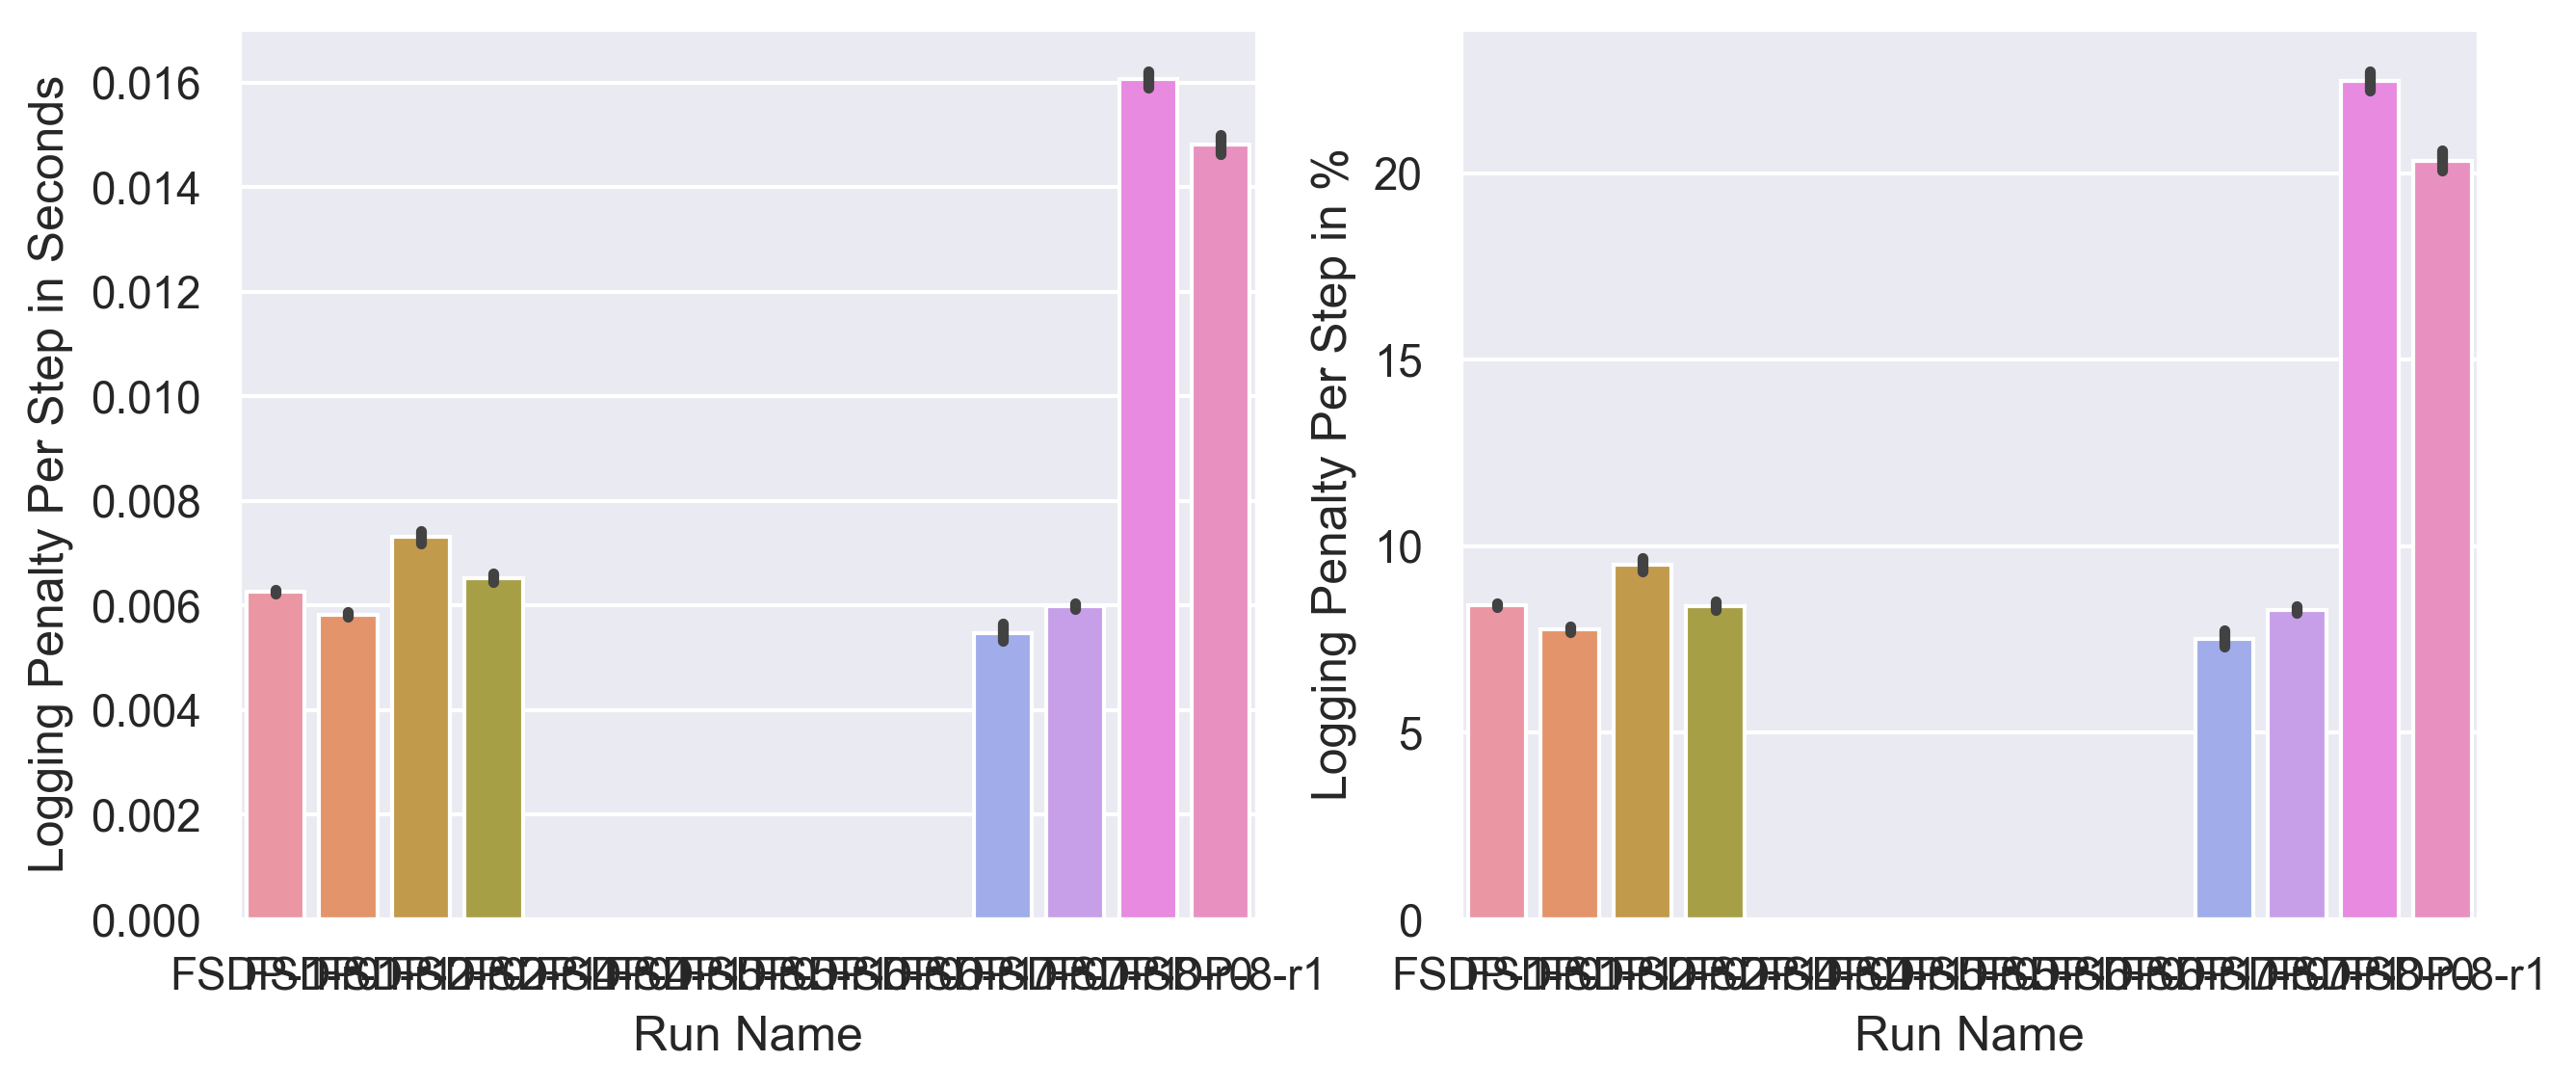

In [310]:
runs_df["logging_penalty_per_step_s"] = runs_df["02_timing/actual_step_time_s"] - runs_df["02_timing/calculated_step_time_s"]
runs_df["logging_penalty_per_step_percent"] = runs_df["logging_penalty_per_step_s"] / runs_df["02_timing/calculated_step_time_s"] * 100
fig, ax = plt.subplots(1, 2, figsize=(10,4))
fig = sns.barplot(
    data=runs_df,
    x="run_name",
    y="logging_penalty_per_step_s",
    ax=ax[0]
)
#ax[0].set_xticks(rotation=90)
ax[0].set_ylabel("Logging Penalty Per Step in Seconds")
ax[0].set_xlabel("Run Name")
fig = sns.barplot(
    data=runs_df,
    x="run_name",
    y="logging_penalty_per_step_percent",
    ax=ax[1]
)
ax[1].set_ylabel("Logging Penalty Per Step in %")
ax[1].set_xlabel("Run Name")

## Selective Metrics View

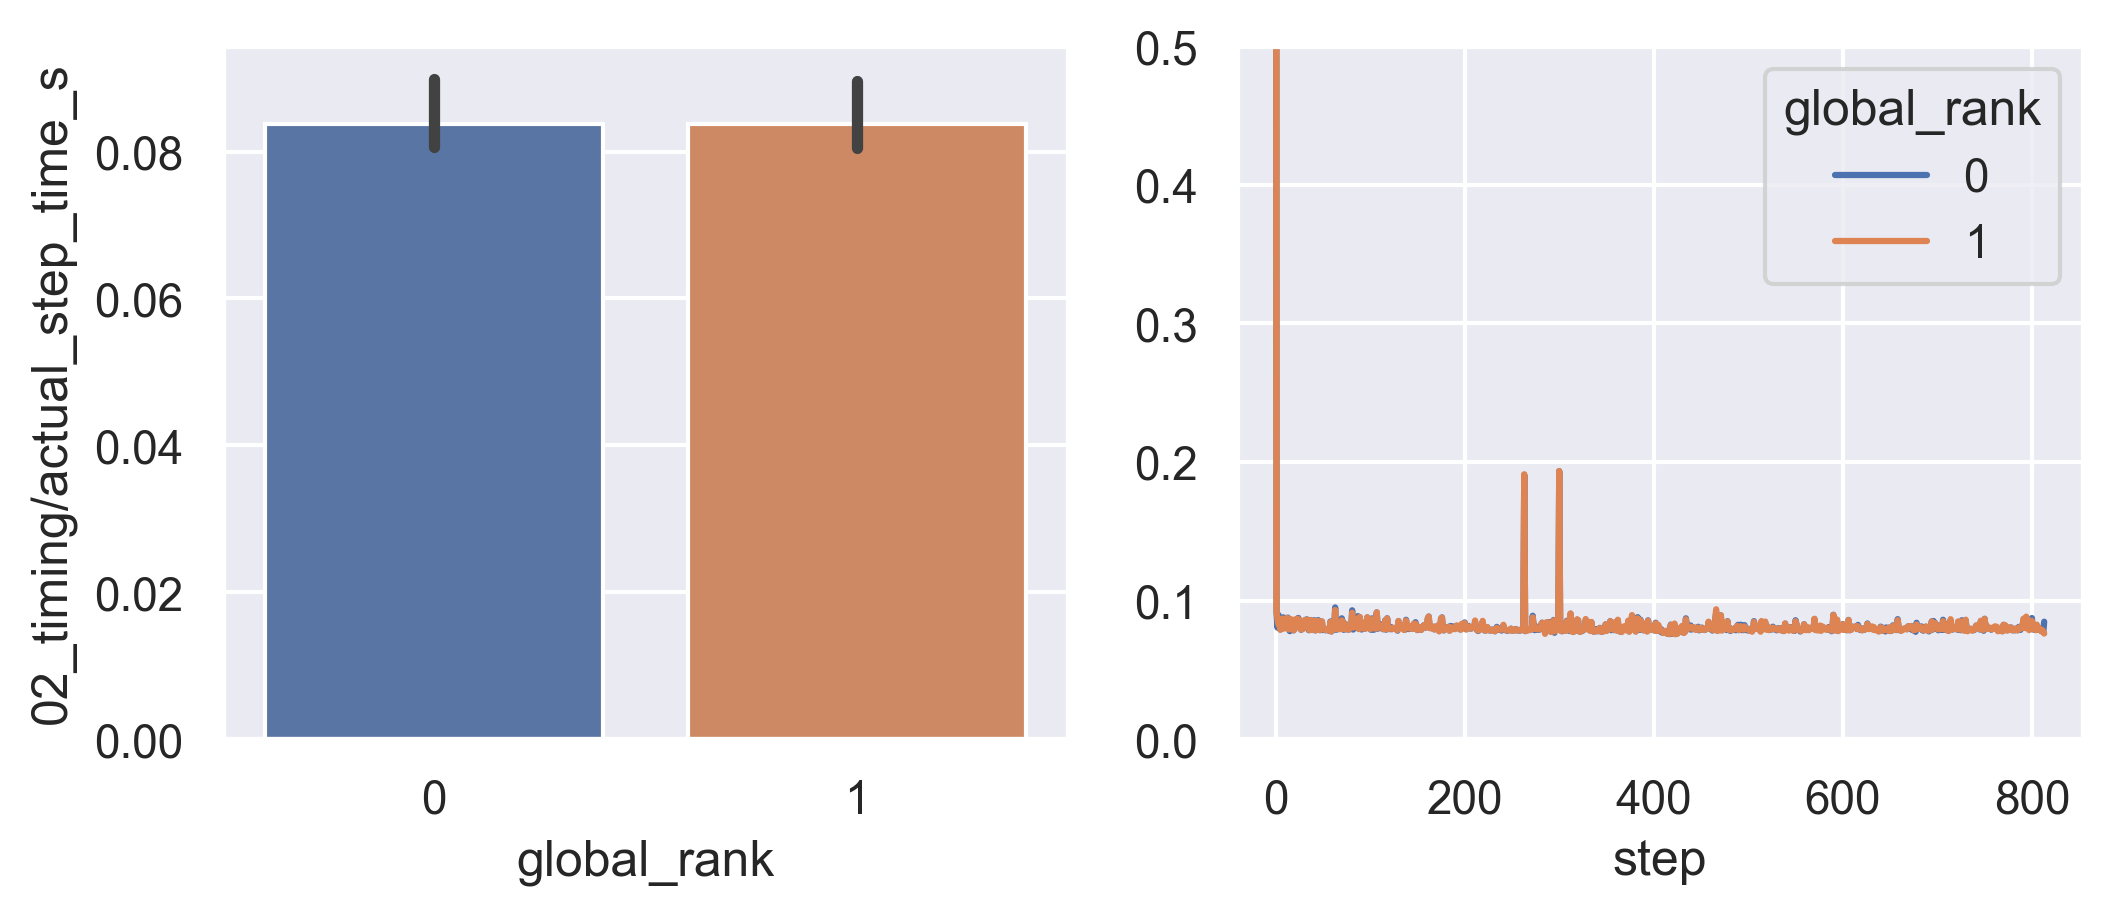

In [224]:
def dual_plot(df, x, y, line_ylim):
    fig, ax = plt.subplots(1,2, figsize=(8,3))
    fig = sns.barplot(
        data=df,
        x=x,
        y=y,
        ax=ax[0])
    fig = sns.lineplot(
        data=df,
        x="step",
        y=y,
        ax=ax[1],
        hue=x)
    ax[1].set_ylabel("")
    ax[1].set_ylim(line_ylim)

test_run = runs_df.query("group_name=='FSDP-1'")
x = "global_rank"
y = "02_timing/actual_step_time_s"
dual_plot(df=test_run, x=x, y=y, line_ylim=[0,0.5])

##  Step Timing Of All Runs

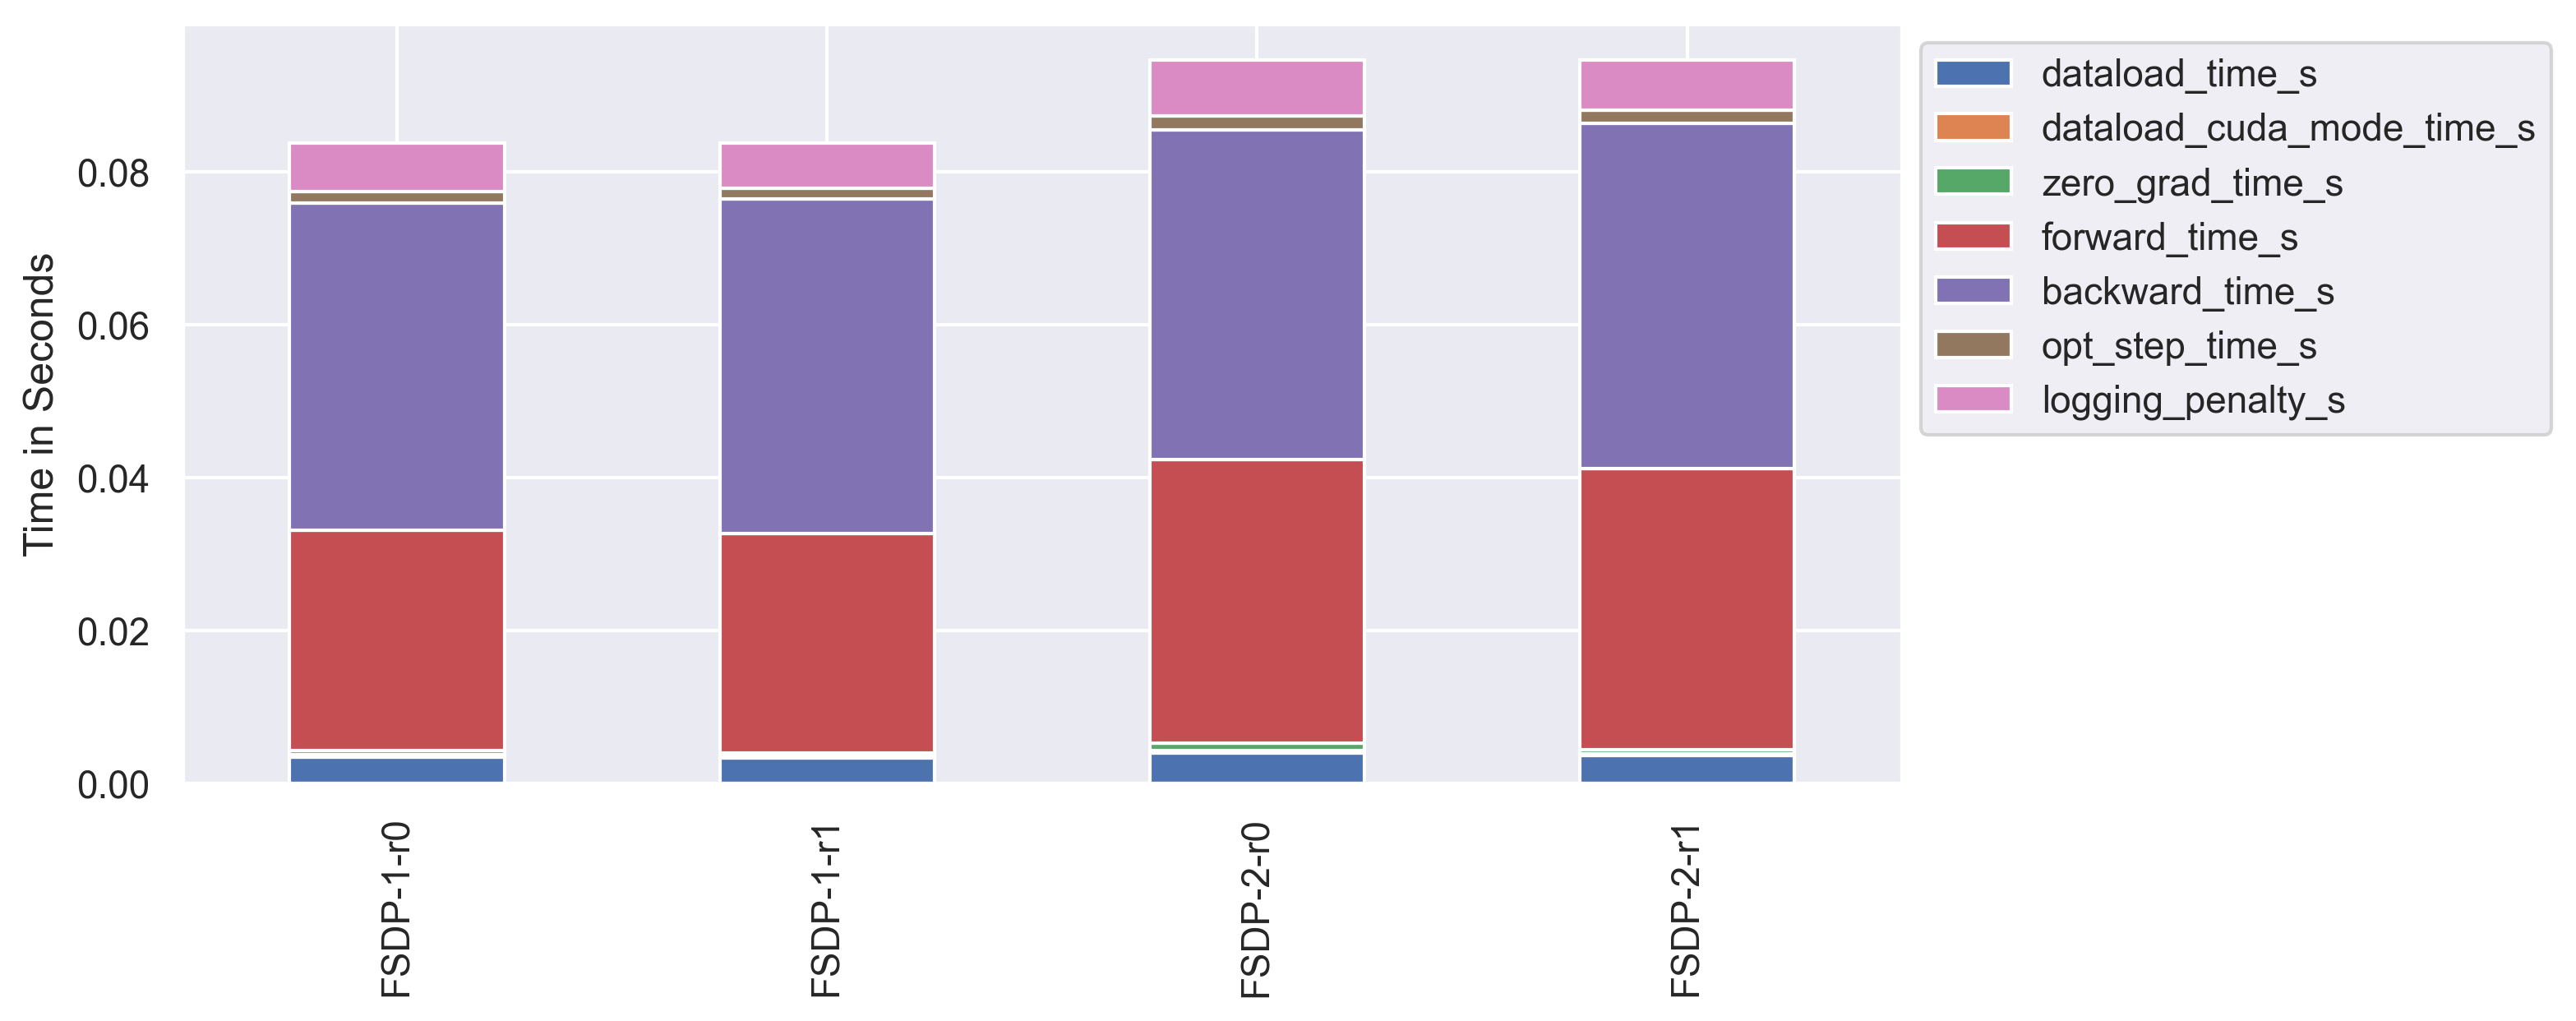

In [288]:
def get_average_step_timings(df):
    mean_df = df.mean(numeric_only=True).to_frame().T
    mean_df["run_name"] = df["run_name"].unique()[0]
    mean_df = mean_df.rename(columns={
                            "02_timing/dataload_time_s": "dataload_time_s",
                            "02_timing/dataload_cuda_mode_time_s": "dataload_cuda_mode_time_s",
                            "02_timing/zero_grad_time_s": "zero_grad_time_s",
                            "02_timing/forward_time_s": "forward_time_s",
                            "02_timing/backward_time_s": "backward_time_s",
                            "02_timing/opt_step_time_s": "opt_step_time_s",
                            "logging_penalty_per_step_s": "logging_penalty_s"
                            })
    
    exported_labels = [
        "dataload_time_s",
        "dataload_cuda_mode_time_s",
        "zero_grad_time_s",
        "forward_time_s",
        "backward_time_s",
        "opt_step_time_s",
        "logging_penalty_s",
        "run_name"]
    return mean_df[exported_labels], exported_labels

timings = []

for run_name in runs_df["run_name"].unique():
    single_run = runs_df.query(f"run_name=='{run_name}'")
    avg_step_timing_df, exported_labels = get_average_step_timings(df=single_run)
    timings.append(avg_step_timing_df)

all_step_timings_df = pd.concat(objs=timings)
ax = all_step_timings_df[exported_labels].set_index("run_name").plot(kind="bar", stacked=True, figsize=(9,4))
plt.ylabel("Time in Seconds")
plt.xlabel("")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1))

## Epoch + Training Time For All Runs

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
fig = sns.barplot(
    data=runs_df,
    x="run_name",
    y="logging_penalty_per_step_s",
    ax=ax[0]
)
#ax[0].set_xticks(rotation=90)
ax[0].set_ylabel("Logging Penalty Per Step in Seconds")
ax[0].set_xlabel("Run Name")
fig = sns.barplot(
    data=runs_df,
    x="run_name",
    y="logging_penalty_per_step_percent",
    ax=ax[1]
)
ax[1].set_ylabel("Logging Penalty Per Step in %")
ax[1].set_xlabel("Run Name")

<Axes: xlabel='step', ylabel='02_timing/running_training_time_s'>

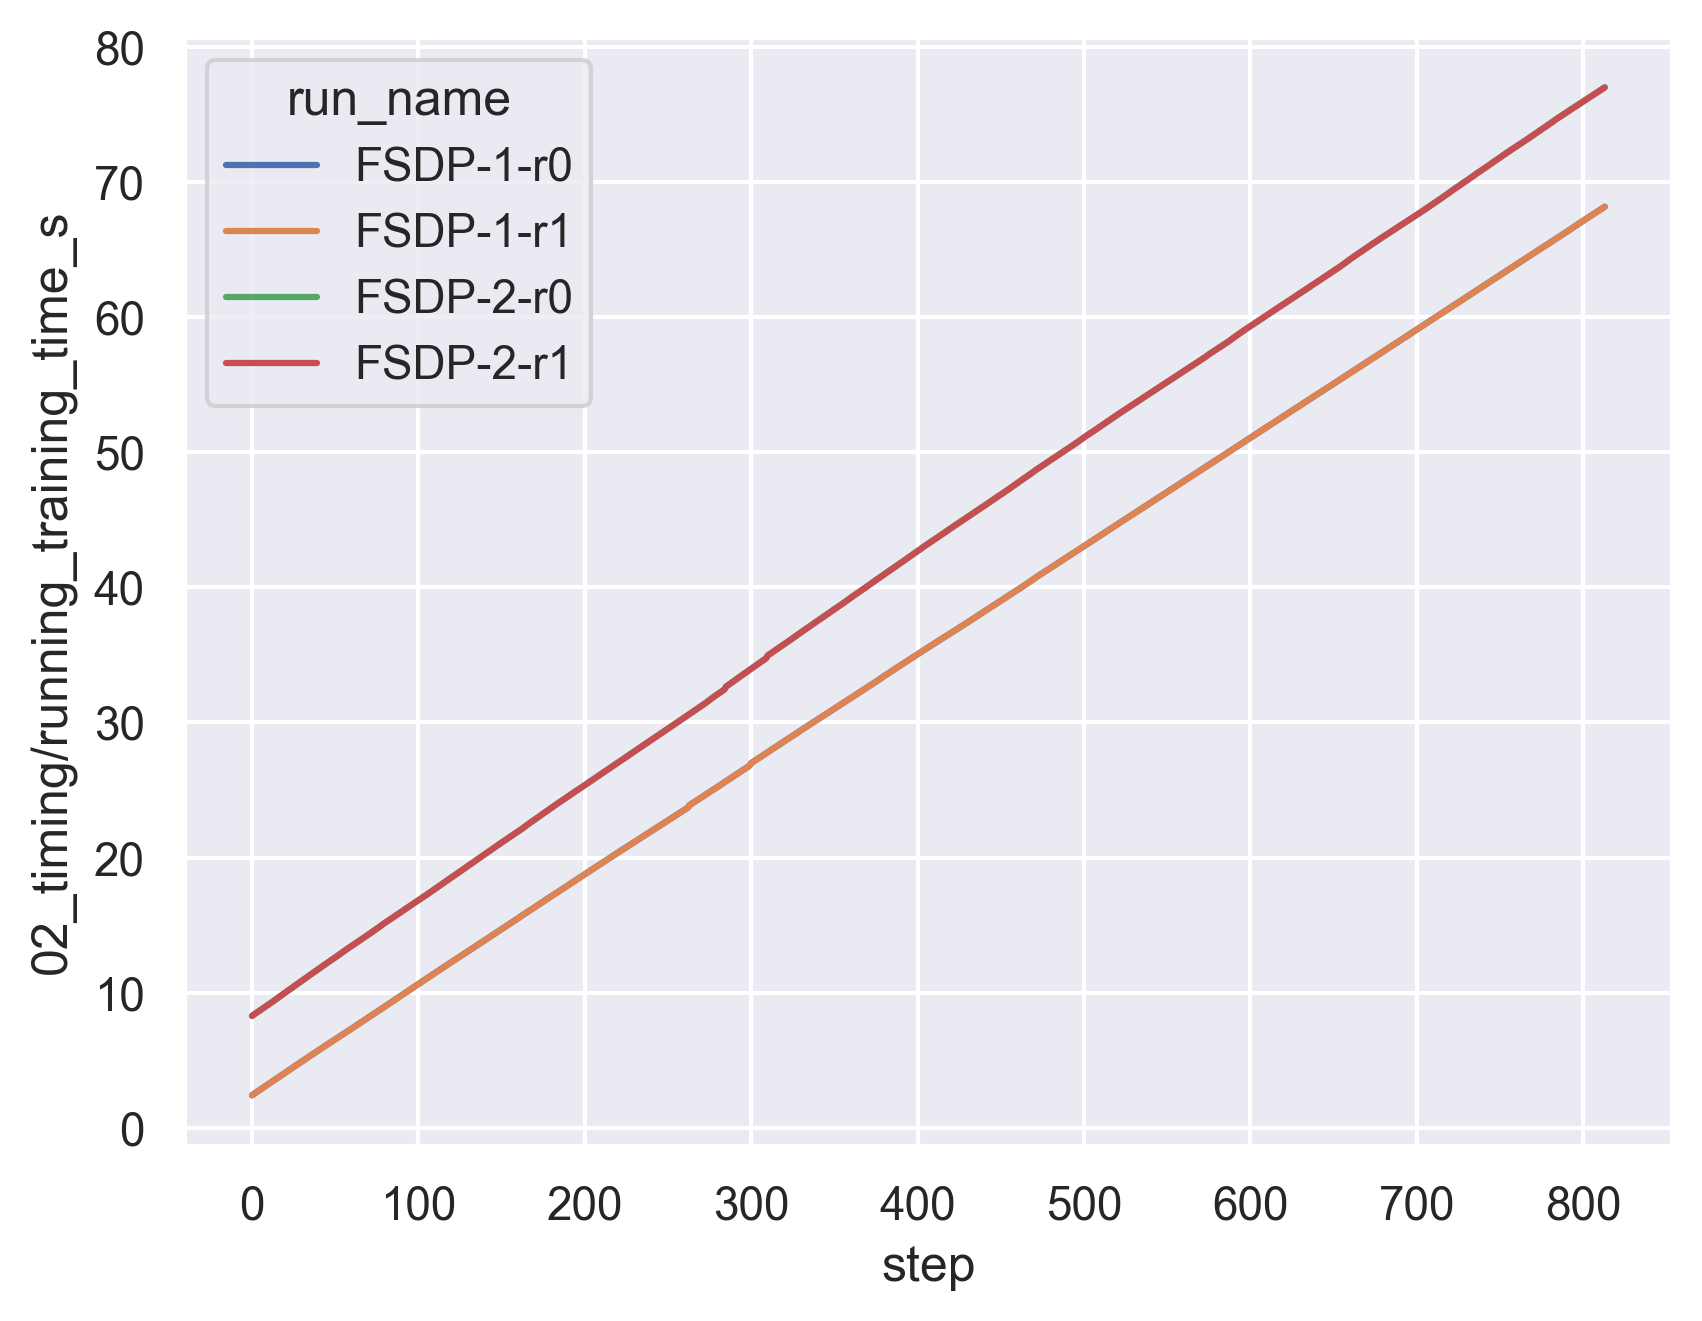

In [296]:
runs_df[['02_timing/running_epoch_time_s', "run_name", "step"]].query("run_name=='FSDP-1-r0'") #, '02_timing/running_training_time_s'

sns.lineplot(data=runs_df, x="step", y="02_timing/running_training_time_s", hue="run_name")